In [29]:

from sklearn.datasets import make_moons
# Libraries for plotting

import matplotlib.pyplot as plt
from matplotlib import pyplot  
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams["font.size"]= 15
    
# Libraries for array calculations
import numpy as np

# Import dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [30]:
X.shape

(50, 2)

In [56]:
y.shape

(50,)

Text(0, 0.5, 'X[1]')

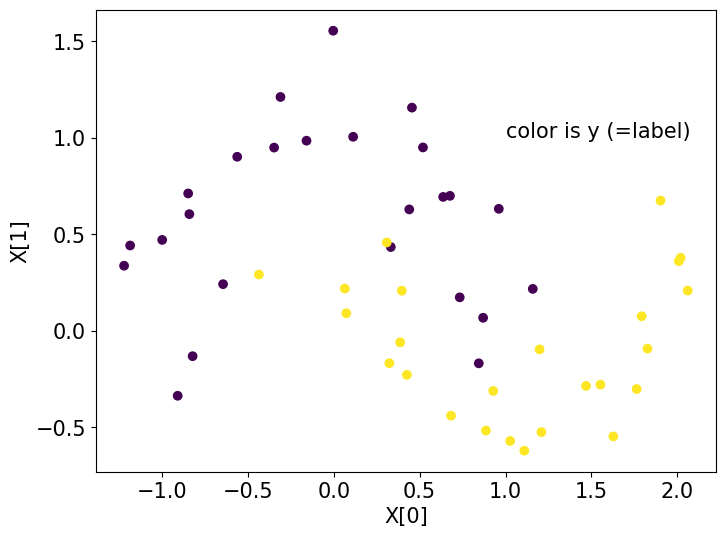

In [32]:
# Make a scatterplot of the 2 columns of X
# Color the data points according to the labels y
plt.scatter(X[:,0],X[:,1], c=y)

plt.text(1,1,'color is y (=label)')
plt.xlabel('X[0]')
plt.ylabel('X[1]')

In [33]:
X = np.hstack([X, np.ones((X.shape[0], 1))])

In [34]:
X

array([[-0.15856989,  0.98480618,  1.        ],
       [ 1.10900374, -0.62160223,  1.        ],
       [ 0.39641523,  0.20740869,  1.        ],
       [ 1.79239122,  0.07511293,  1.        ],
       [-0.84739307,  0.71154296,  1.        ],
       [ 1.90209657,  0.67432213,  1.        ],
       [ 0.0731551 ,  0.09079042,  1.        ],
       [-0.43566685,  0.29122072,  1.        ],
       [ 0.42577731, -0.22851359,  1.        ],
       [-0.64418143,  0.24144478,  1.        ],
       [ 0.11289285,  1.00510013,  1.        ],
       [ 0.96066405,  0.63183812,  1.        ],
       [ 1.46814927, -0.28580296,  1.        ],
       [ 0.5192833 ,  0.94984582,  1.        ],
       [ 0.73327397,  0.17310931,  1.        ],
       [ 0.33197143,  0.43375035,  1.        ],
       [ 1.62726102, -0.54736954,  1.        ],
       [ 2.01908805,  0.37804882,  1.        ],
       [ 2.00824323,  0.36058988,  1.        ],
       [-0.56195047,  0.90148197,  1.        ],
       [ 0.67647169,  0.69909987,  1.   

In [35]:
def sigmoid(x):
    '''logistic function; tranforms input number to generate output value between 0 and 1'''
    
    return 1 / (1 + np.exp(-x))

In [36]:
##test of function
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

In [37]:
hidden_w = np.random.rand(3, 2)  #3 inputs feed into 2 neurons inne weights
outer_w = np.random.rand(3, 1)     #3 inputs feed into 1 neuron  outer weights

In [38]:
hidden_w  # innner randm  weight 2 columns/vectors

array([[0.15468396, 0.88261132],
       [0.0036007 , 0.07565782],
       [0.30028734, 0.29862919]])

In [39]:
outer_w #outer weights 1 columns/vectore

array([[0.43199506],
       [0.7987361 ],
       [0.02407352]])

In [40]:
weights = [hidden_w, outer_w]
#column 1 is the hidden weighers  od the inner weights an column 2 the outer weights

In [41]:
weights

[array([[0.15468396, 0.88261132],
        [0.0036007 , 0.07565782],
        [0.30028734, 0.29862919]]),
 array([[0.43199506],
        [0.7987361 ],
        [0.02407352]])]

In [42]:
weights[0].shape
weights[1].shape


(3, 1)

In [43]:
X.shape

(50, 3)

In [44]:
def feed_forward(X, weights):

    """
    1. Calculate the dot product of X
       and the weights of the first layer: first column of the weights array (weights[0]).

    2. Apply the sigmoid function on the result (transform weigts[0] with sigmoid to val
       between 0 and 1)).

    3. Append an extra column of ones to the result (i.e. the bias).

    4. Calculate the dot product of the previous step
       with the weights of the second (i.e. outer) layer.

    5. Apply the sigmoid function on the result.

    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """
    
    #1
    step1 = np.dot(X, weights[0])
    #print(step1)
    #2
    step2 = sigmoid(step1)
    
    #3
    step3 = np.hstack([step2, np.ones((step2.shape[0], 1))])
    ###CAREFUL.re un wit care otherwise step 2 keep on receiving a new column of 1s#####
    
    #4 
    step4 = np.dot(step3, weights[1])
    
    #5
    step5 = sigmoid(step4)
    
    #6

    return step2, step5

In [49]:
out1, out2 = feed_forward(X, weights)

In [55]:
out1, out2 = feed_forward(X, [hidden_w, outer_w])
assert out1.shape == (50, 2)
assert out2.shape == (50, 1)

X_ref = np.array([[1.0, 2.0, 1.0]])
w_hidden = np.array([[1.0, 2.0, 0.0],
                 [-1.0, -2.0, 0.0]
                    ]).T
w_out = np.array([[1.0, -1.0, 0.5]]).T

out1, out2 = feed_forward(X_ref, [w_hidden, w_out])
assert np.all(out1.round(2) == np.array([[0.99, 0.01]]))
assert np.all(out2.round(2) == np.array([[0.82]]))


